# Convolutional Network

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses, metrics
np.random.seed(42)
tf.random.set_seed(42)

# gpus = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(gpus[0], True)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    print(e)

## Load data

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

batch_size = 500
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
data_train = data_train.shuffle(buffer_size=1024).batch(batch_size)
data_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
data_val = data_val.batch(batch_size)
data_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
data_test = data_test.batch(batch_size)

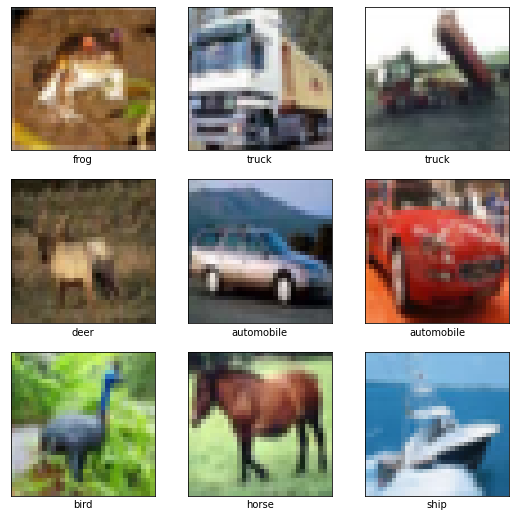

(40000, 32, 32, 3) (40000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()
print(x_train.shape, y_train.shape)

## Create the convolutional base

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [5]:
# logits are the raw predictions which come out of the neural network
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

history = model.fit(
    data_train,
    epochs=30,
    validation_data=data_val
)

80/80 [==============================] - 12s 57ms/step - loss: 2.2058 - sparse_categorical_accuracy: 0.2021 - val_loss: 1.8294 - val_sparse_categorical_accuracy: 0.3451
